In [1]:
%matplotlib inline
import keras
from matplotlib import pyplot as plt
import numpy as np
import cv2 # Opencv
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
import os 

# hyper parameters
batch_size = 512
num_classes = 10
epochs = 30

/home/ericakcc/anaconda3/envs/tensorflow/lib/python3.5/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# keras 內建的下載mnist資料

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data(path='mnist.npz')

下載下來原始的檔案是（28X28）的圖像大小
大概如下圖所示  
但因為我沒有要使用cnn 我只用全連接層做model 所以我會把他flatten(拉直)  
並且把像素/255 使每個像素介於0~1之間（模式會比較好fit）

(60000, 28, 28)


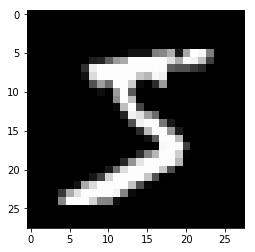

In [3]:
print(x_train.shape) # training data
img1 = x_train[0]
plt.imshow(img1, 'gray')

In [4]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255 # normalize
x_test /= 255 # normalize 
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# 這是一個隨便亂接的model

In [6]:
def built_model(): 
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(784,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.summary()

    return model

In [7]:
model = built_model()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))

# save model
model_dir = './models'
if not os.path.exists(model_dir):
    os.mkdir(model_dir)
model.save(model_dir + '/model_1.h5')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
Total params: 63,370
Trainable params: 63,370
Non-trainable params: 0
_________________________________________________________________
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 1s 13us/step - loss: 0.7249 - 

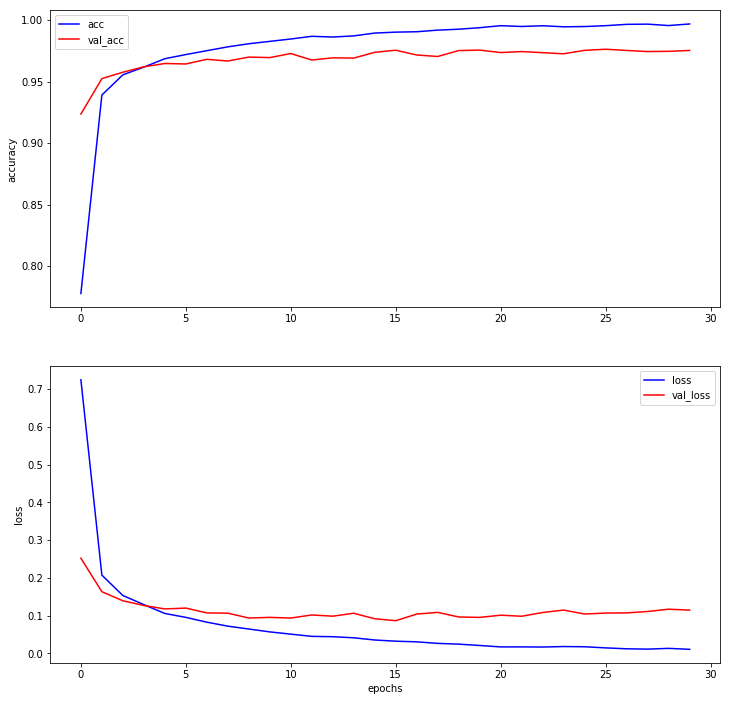

In [9]:
# plot loss and accuracy
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,12))
plt.subplot(2,1,1)
plt.ylabel('accuracy')
plt.plot(range(epochs), acc, 'b', label='acc')
plt.plot(range(epochs), val_acc, 'r', label='val_acc')
plt.legend()
plt.subplot(2,1,2)
plt.ylabel('loss')
plt.plot(range(epochs), loss, 'b', label='loss')
plt.plot(range(epochs), val_loss, 'r', label='val_loss')
plt.xlabel('epochs')
plt.legend()

In [10]:
# load your model 
model = load_model('./models/model_1.h5')

img = cv2.imread('./real_img/35062719_1941302955894222_4729918758619971584_n.png')

------
因為你小畫家弄出來的圖是彩色(3個頻道)的，要先轉成灰階  
接著因為我training 的時候有normailze(把全部的pixel都除以255)  
所以test的時候也要做一樣的事情  
當然你也可以training的時候不做normalize

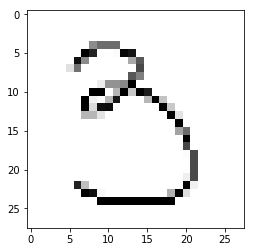

In [11]:
img = cv2.imread('./real_img/35062719_1941302955894222_4729918758619971584_n.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # turn RGB to gray
img = cv2.resize(img, (28,28)) # resize
plt.imshow(img, 'gray')

img = img.astype('float32')
img /= 255 # normalize
img = img.reshape(1,784) # flatten

In [12]:
pre = model.predict(img)
pre = np.argmax(pre)
pre

2

大概就全部就是這樣，然後我訓練出的model覺得你寫的3是2 XD  
不過這只是用全連接曾去訓練的，用CNN表現會比較好一點~